In [1]:
import pandas as pd
import seaborn as sns

In [2]:
#df = pd.read_csv('../datasets/full_clean.csv', parse_dates=['date_'])


In [3]:
df.ticker.unique()

array(['AMZN', 'GOOGL', 'GOOG', 'TSLA', 'AAPL', 'MSFT'], dtype=object)

In [4]:
df.columns

Index(['date_', 'ticker', 'open', 'high', 'low', 'close', 'vol', 'max_comp',
       'max_neg', 'max_neu', 'max_pos', 'min_comp', 'min_neg', 'min_neu',
       'min_pos', 'std_comp', 'std_neg', 'std_neu', 'std_pos', 'mean_comp',
       'mean_neg', 'mean_neu', 'mean_pos', 'median_comp', 'median_neg',
       'median_neu', 'median_pos', 'count'],
      dtype='object')

In [5]:
bins_5_vals = [-100, -0.75, -0.25, 0.25, 0.75, 100]

# AMZN

1. Adjust prices to a split by dividing them by 20

In [6]:
amzn = df[df['ticker'] == 'AMZN'].copy()
amzn[['open', 'high', 'low', 'close']] = amzn[['open', 'high', 'low', 'close']]/20
amzn['diffs'] = amzn.close.pct_change() * 100
# drop 1 NaN value
amzn = amzn.dropna()

<AxesSubplot:xlabel='diffs', ylabel='Count'>

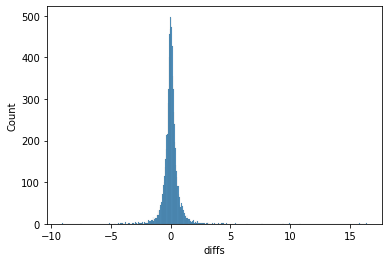

In [7]:
sns.histplot(amzn, x='diffs')

In [8]:
amzn.diffs.describe(percentiles=[0.025, 0.975])

count    8613.000000
mean        0.022990
std         0.697298
min        -9.063159
2.5%       -1.189902
50%         0.013113
97.5%       1.245116
max        16.392219
Name: diffs, dtype: float64

We can see that 95% of the values lie in range -1.19% to 1.25%

<AxesSubplot:xlabel='diffs', ylabel='Count'>

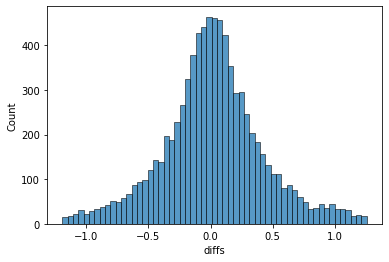

In [9]:
diffs_no_outliers = amzn[(amzn['diffs']>-1.20) & (amzn['diffs']<1.26)].copy()

sns.histplot(diffs_no_outliers, x='diffs')

<AxesSubplot:xlabel='diffs', ylabel='Count'>

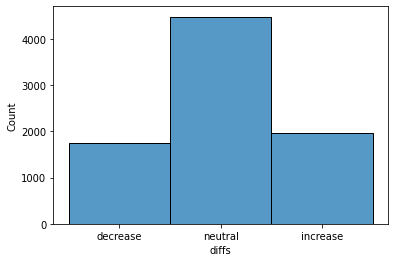

In [10]:
# amzn distribution for 3 bins without outliers
x = pd.cut(diffs_no_outliers.diffs, bins=[-100, -0.25, 0.25, 100], labels=['decrease', 'neutral', 'increase'])
sns.histplot(x)

<AxesSubplot:xlabel='diffs', ylabel='Count'>

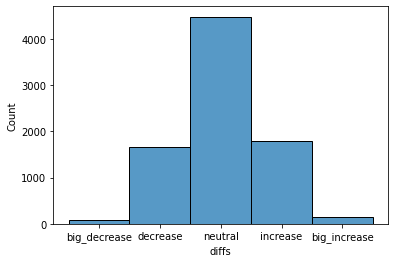

In [11]:
# amzn distribution for 5 bins without outliers
x, bins_5 = pd.cut(diffs_no_outliers.diffs, bins=bins_5_vals, labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'] ,retbins=True)
sns.histplot(x)

In [12]:
print(bins_5)

[-100.     -1.     -0.25    0.25    1.    100.  ]


In [13]:
# how many outliers, what % of the data they are
diff_in_len = len(amzn)-len(diffs_no_outliers)
print(diff_in_len, round(diff_in_len/len(amzn)*100, 2))

425 4.93


In [14]:
amzn['bin_2'] = pd.cut(amzn.diffs, bins=[-100, 0, 100], labels=[-1, 1])
amzn['bin_3'] = pd.cut(amzn.diffs, bins=[-100, -0.25, 0.25, 100], labels=[-1, 0, 1])
amzn['bin_5'] = pd.cut(amzn.diffs, bins=bins_5_vals, labels=[-2, -1, 0, 1, 2])

In [15]:
amzn.to_csv('../datasets/binned/amzn_binned.csv', index=False)

# Tesla

Adjust for a split by divinding by 5

In [16]:
tsla = df[df['ticker'] == 'TSLA'].copy()

In [17]:
tsla[['open', 'high', 'low', 'close']] = tsla[['open', 'high', 'low', 'close']]/5
tsla['diffs'] = tsla.close.pct_change() * 100
# drop 1 NaN value
tsla = tsla.dropna()

In [18]:
tsla.diffs.describe(percentiles=[0.025, 0.975])

count    8687.000000
mean        0.012902
std         1.044761
min       -13.684852
2.5%       -1.891711
50%         0.013187
97.5%       1.976242
max        17.482623
Name: diffs, dtype: float64

We can see that 95% of the values lie in range -1.9% to 1.98%

<AxesSubplot:xlabel='diffs', ylabel='Count'>

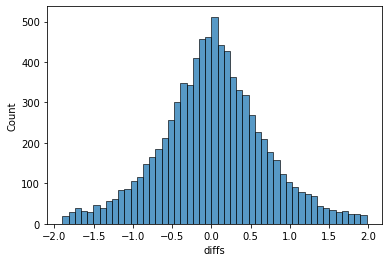

In [19]:
diffs_no_outliers = tsla[(tsla['diffs']>-1.9) & (tsla['diffs']<1.98)].copy()

sns.histplot(diffs_no_outliers, x='diffs')

<AxesSubplot:xlabel='diffs', ylabel='Count'>

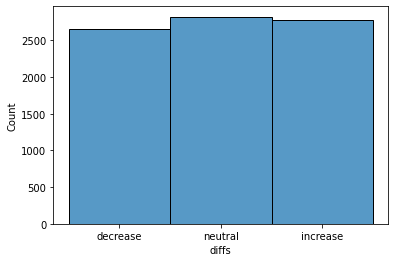

In [20]:
# amzn distribution for 3 bins without outliers
x, bins_3 = pd.cut(diffs_no_outliers.diffs, bins=[-100, -0.25, 0.25, 100], labels=['decrease', 'neutral', 'increase'], retbins=True)
sns.histplot(x)

In [21]:
x.value_counts(normalize=True)

neutral     0.341895
increase    0.336322
decrease    0.321783
Name: diffs, dtype: float64

<AxesSubplot:xlabel='diffs', ylabel='Count'>

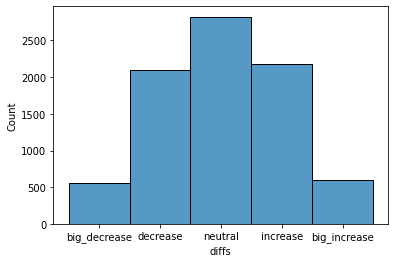

In [22]:
# amzn distribution for 5 bins without outliers
x, bins_5 = pd.cut(diffs_no_outliers.diffs, bins=bins_5_vals, labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'] ,retbins=True)
sns.histplot(x)

In [23]:
x.value_counts(normalize=True)

neutral         0.341895
increase        0.263751
decrease        0.253695
big_increase    0.072571
big_decrease    0.068088
Name: diffs, dtype: float64

In [24]:
# how many outliers, what % of the data they are
diff_in_len = len(tsla)-len(diffs_no_outliers)
print(diff_in_len, round(diff_in_len/len(tsla)*100, 2))

433 4.98


In [25]:
tsla['bin_2'] = pd.cut(tsla.diffs, bins=[-100, 0, 100], labels=[-1, 1])
tsla['bin_3'] = pd.cut(tsla.diffs, bins=[-100, -0.25, 0.25, 100], labels=[-1, 0, 1])
tsla['bin_5'] = pd.cut(tsla.diffs, bins=bins_5_vals, labels=[-2, -1, 0, 1, 2])

In [26]:
tsla.to_csv('../datasets/binned/tsla_binned.csv', index=False)

# Apple

Adjust for two stock splits by diving by 4, each split was by 2

In [27]:
aapl = df[df['ticker'] == 'AAPL'].copy()

In [28]:
aapl[['open', 'high', 'low', 'close']] = aapl[['open', 'high', 'low', 'close']]/4
aapl['diffs'] = aapl.close.pct_change() * 100
# drop 1 NaN value
aapl = aapl.dropna()

In [29]:
aapl.diffs.describe(percentiles=[0.025, 0.975])

count    8562.000000
mean        0.013259
std         0.591188
min        -8.554965
2.5%       -1.124361
50%         0.011340
97.5%       1.116002
max         7.554077
Name: diffs, dtype: float64

We can see that 95% of the values lie in range -1.12% to 1.11%

<AxesSubplot:xlabel='diffs', ylabel='Count'>

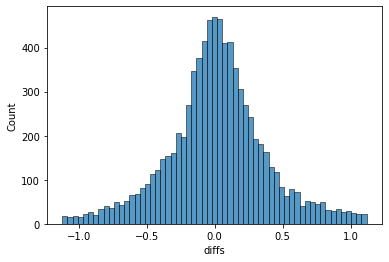

In [30]:
diffs_no_outliers = aapl[(aapl['diffs']>-1.12) & (aapl['diffs']<1.12)].copy()

sns.histplot(diffs_no_outliers, x='diffs')

<AxesSubplot:xlabel='diffs', ylabel='Count'>

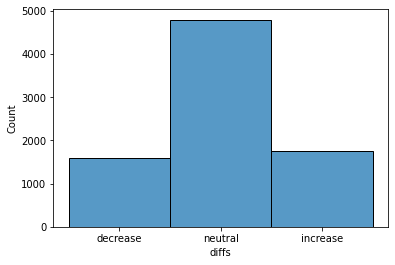

In [31]:
# amzn distribution for 3 bins without outliers
x, bins_3 = pd.cut(diffs_no_outliers.diffs, bins=[-100, -0.25, 0.25, 100], labels=['decrease', 'neutral', 'increase'], retbins=True)
sns.histplot(x)

In [32]:
x.value_counts(normalize=True)

neutral     0.589472
increase    0.215103
decrease    0.195425
Name: diffs, dtype: float64

<AxesSubplot:xlabel='diffs', ylabel='Count'>

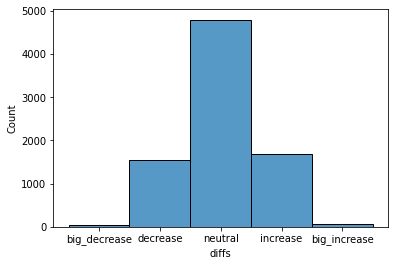

In [33]:
# amzn distribution for 5 bins without outliers
x, bins_5 = pd.cut(diffs_no_outliers.diffs, bins=bins_5_vals, labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'] ,retbins=True)
sns.histplot(x)

In [34]:
x.value_counts(normalize=True)

neutral         0.589472
increase        0.206371
decrease        0.189030
big_increase    0.008732
big_decrease    0.006395
Name: diffs, dtype: float64

In [35]:
print(bins_5)

[-100.     -1.     -0.25    0.25    1.    100.  ]


In [36]:
# how many outliers, what % of the data they are
diff_in_len = len(aapl)-len(diffs_no_outliers)
print(diff_in_len, round(diff_in_len/len(aapl)*100, 2))

431 5.03


In [37]:
aapl['bin_2'] = pd.cut(aapl.diffs, bins=[-100, 0, 100], labels=[-1, 1])
aapl['bin_3'] = pd.cut(aapl.diffs, bins=bins_3, labels=[-1, 0, 1])
aapl['bin_5'] = pd.cut(aapl.diffs, bins=bins_5_vals, labels=[-2, -1, 0, 1, 2])

In [38]:
aapl.to_csv('../datasets/binned/aapl_binned.csv', index=False)

# Microsoft

In [39]:
msft = df[df['ticker'] == 'MSFT'].copy()

In [40]:
msft['diffs'] = msft.close.pct_change() * 100
# drop 1 NaN value
msft = msft.dropna()

In [41]:
msft.diffs.describe(percentiles=[0.025, 0.975])

count    8611.000000
mean        0.015546
std         0.561287
min        -9.670563
2.5%       -1.066537
50%         0.014783
97.5%       1.056144
max        10.993129
Name: diffs, dtype: float64

We can see that 95% of the values lie in range -1.07% to 1.06%

<AxesSubplot:xlabel='diffs', ylabel='Count'>

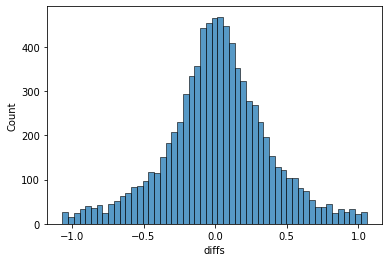

In [42]:
diffs_no_outliers = msft[(msft['diffs']>-1.07) & (msft['diffs']<1.06)].copy()

sns.histplot(diffs_no_outliers, x='diffs')

<AxesSubplot:xlabel='diffs', ylabel='Count'>

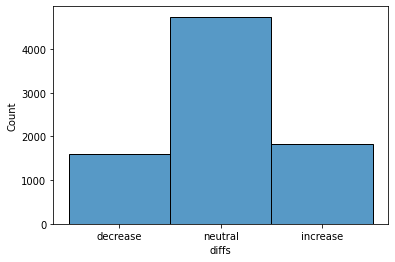

In [43]:
# amzn distribution for 3 bins without outliers
x, bins_3 = pd.cut(diffs_no_outliers.diffs, bins=[-100, -0.25, 0.25, 100], labels=['decrease', 'neutral', 'increase'], retbins=True)
sns.histplot(x)

In [44]:
x.value_counts(normalize=True)

neutral     0.579738
increase    0.224734
decrease    0.195527
Name: diffs, dtype: float64

<AxesSubplot:xlabel='diffs', ylabel='Count'>

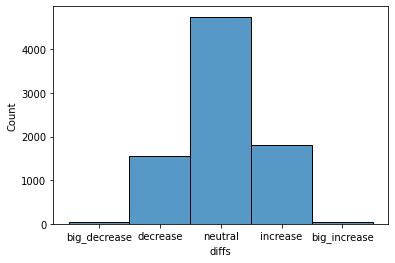

In [45]:
# amzn distribution for 5 bins without outliers
x, bins_5 = pd.cut(diffs_no_outliers.diffs, bins=bins_5_vals, labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'], retbins=True)
sns.histplot(x)

In [46]:
bins_5[0] = -100
bins_5[-1] = 100

In [47]:
x.value_counts(normalize=True)

neutral         0.579738
increase        0.220701
decrease        0.190761
big_decrease    0.004766
big_increase    0.004033
Name: diffs, dtype: float64

In [48]:
# how many outliers, what % of the data they are
diff_in_len = len(msft)-len(diffs_no_outliers)
print(diff_in_len, round(diff_in_len/len(msft)*100, 2))

428 4.97


In [49]:
msft['bin_2'] = pd.cut(msft.diffs, bins=[-100, 0, 100], labels=[-1, 1])
msft['bin_3'] = pd.cut(msft.diffs, bins=bins_3, labels=[-1, 0, 1])
msft['bin_5'] = pd.cut(msft.diffs, bins=bins_5, labels=[-2, -1, 0, 1, 2])

In [50]:
msft.to_csv('../datasets/binned/msft_binned.csv', index=False)

# Goog

In [51]:
goog = df[df['ticker'] == 'GOOG'].copy()

In [52]:
goog['diffs'] = goog.close.pct_change() * 100
# drop 1 NaN value
goog = goog.dropna()

In [53]:
goog.diffs.describe(percentiles=[0.025, 0.975])

count    8780.000000
mean        0.012145
std         0.570715
min        -7.609911
2.5%       -1.039768
50%         0.009183
97.5%       1.049737
max        12.614165
Name: diffs, dtype: float64

We can see that 95% of the values lie in range -1.04% to 1.05%

<AxesSubplot:xlabel='diffs', ylabel='Count'>

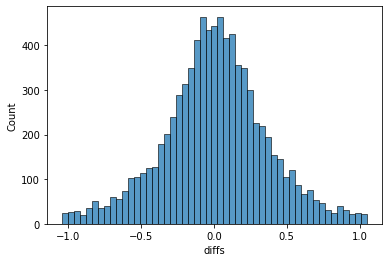

In [54]:
diffs_no_outliers = goog[(goog['diffs']>-1.04) & (goog['diffs']<1.05)].copy()

sns.histplot(diffs_no_outliers, x='diffs')

<AxesSubplot:xlabel='diffs', ylabel='Count'>

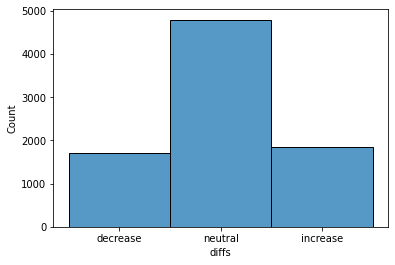

In [55]:
# amzn distribution for 3 bins without outliers
x, bins_3 = pd.cut(diffs_no_outliers.diffs, bins=[-100, -0.25, 0.25, 100], labels=['decrease', 'neutral', 'increase'], retbins=True)
sns.histplot(x)

In [56]:
x.value_counts(normalize=True)

neutral     0.574101
increase    0.221463
decrease    0.204436
Name: diffs, dtype: float64

<AxesSubplot:xlabel='diffs', ylabel='Count'>

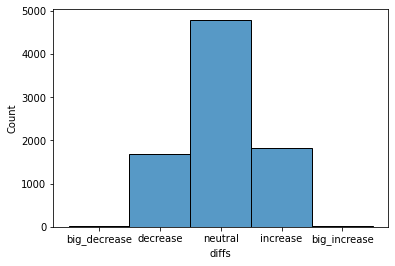

In [57]:
# amzn distribution for 5 bins without outliers
x, bins_5 = pd.cut(diffs_no_outliers.diffs, bins=bins_5_vals, labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'], retbins=True)
sns.histplot(x)

In [58]:
x.value_counts(normalize=True)

neutral         0.574101
increase        0.218585
decrease        0.201559
big_decrease    0.002878
big_increase    0.002878
Name: diffs, dtype: float64

In [59]:
print(bins_5)


[-100.     -1.     -0.25    0.25    1.    100.  ]


In [60]:
bins_5[0] = -100
bins_5[-1] = 100

In [61]:
# how many outliers, what % of the data they are
diff_in_len = len(goog)-len(diffs_no_outliers)
print(diff_in_len, round(diff_in_len/len(goog)*100, 2))

440 5.01


In [62]:
goog['bin_2'] = pd.cut(goog.diffs, bins=[-100, 0, 100], labels=[-1, 1])
goog['bin_3'] = pd.cut(goog.diffs, bins=bins_3, labels=[-1, 0, 1])
goog['bin_5'] = pd.cut(goog.diffs, bins=bins_5, labels=[-2, -1, 0, 1, 2])

In [63]:
goog.to_csv('../datasets/binned/goog_binned.csv', index=False)

# GOOGL

In [64]:
googl = df[df['ticker'] == 'GOOGL'].copy()

In [65]:
googl[['open', 'high', 'low', 'close']] = googl[['open', 'high', 'low', 'close']]/5
googl['diffs'] = googl.close.pct_change() * 100
# drop 1 NaN value
googl = googl.dropna()

In [66]:
googl.diffs.describe(percentiles=[0.025, 0.975])

count    8778.000000
mean        0.012113
std         0.577882
min        -7.501543
2.5%       -1.059171
50%         0.008335
97.5%       1.090677
max        13.801642
Name: diffs, dtype: float64

We can see that 95% of the values lie in range -1.06% to 1.09%

<AxesSubplot:xlabel='diffs', ylabel='Count'>

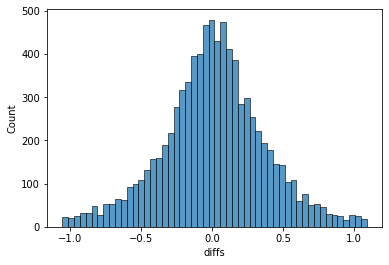

In [67]:
diffs_no_outliers = googl[(googl['diffs']>-1.06) & (googl['diffs']<1.09)].copy()

sns.histplot(diffs_no_outliers, x='diffs')

<AxesSubplot:xlabel='diffs', ylabel='Count'>

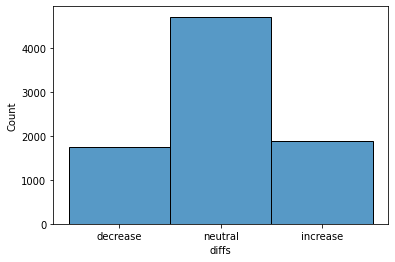

In [68]:
# amzn distribution for 3 bins without outliers
x, bins_3 = pd.cut(diffs_no_outliers.diffs, bins=[-100, -0.25, 0.25, 100], labels=['decrease', 'neutral', 'increase'], retbins=True)
sns.histplot(x)

In [69]:
x.value_counts(normalize=True)

neutral     0.564232
increase    0.226460
decrease    0.209308
Name: diffs, dtype: float64

<AxesSubplot:xlabel='diffs', ylabel='Count'>

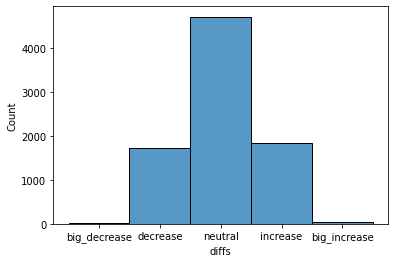

In [70]:
# amzn distribution for 5 bins without outliers
x, bins_5 = pd.cut(diffs_no_outliers.diffs, bins=bins_5_vals, labels=['big_decrease','decrease', 'neutral', 'increase', 'big_increase'], retbins=True)
sns.histplot(x)

In [71]:
bins_5[0] = -100
bins_5[-1] = 100

In [72]:
x.value_counts(normalize=True)

neutral         0.564232
increase        0.221303
decrease        0.205590
big_increase    0.005158
big_decrease    0.003718
Name: diffs, dtype: float64

In [73]:
# how many outliers, what % of the data they are
diff_in_len = len(googl)-len(diffs_no_outliers)
print(diff_in_len, round(diff_in_len/len(googl)*100, 2))

441 5.02


In [74]:
googl['bin_2'] = pd.cut(googl.diffs, bins=[-100, 0, 100], labels=[-1, 1])
googl['bin_3'] = pd.cut(googl.diffs, bins=bins_3, labels=[-1, 0, 1])
googl['bin_5'] = pd.cut(googl.diffs, bins=bins_5, labels=[-2, -1, 0, 1, 2])

In [75]:
googl.to_csv('../datasets/binned/googl_binned.csv', index=False)